In [39]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd
import xgboost as xgb
from scipy.stats import norm
from scipy.signal import chirp, find_peaks, peak_widths

In [5]:
XGBoost_data = np.loadtxt('XGBoost_distances_xgboost.csv')
MLP_data = np.loadtxt('MLP_distances.csv')

In [6]:
#manual inspection
XGBoost_best = XGBoost_data.reshape((-1, 245, 245))[9]
MLP_best = MLP_data.reshape((-1, 245, 245))[9]

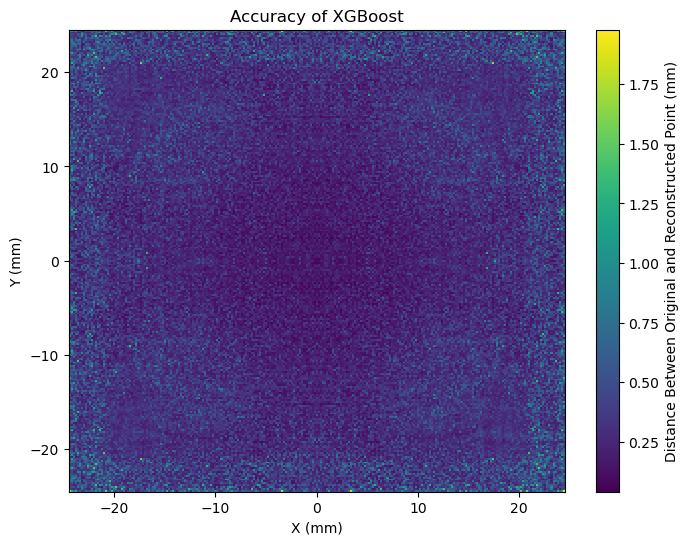

In [7]:
#XGBoost colormap
xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, XGBoost_best, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of XGBoost')

# Display the plot
plt.savefig("xgboost_accuracy.png")

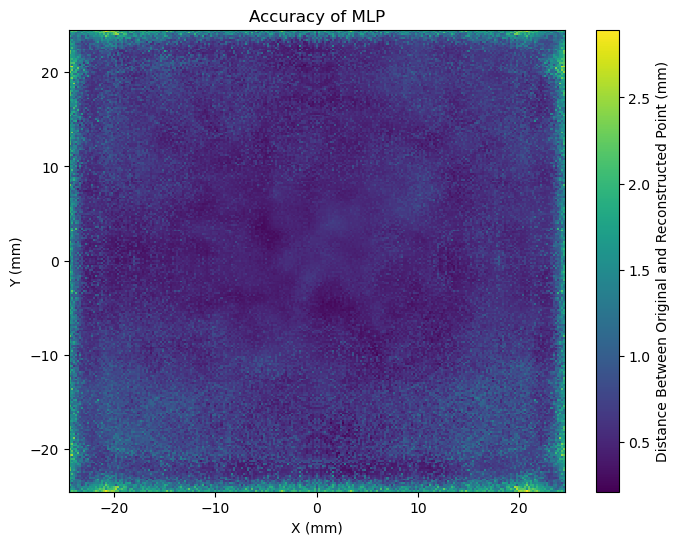

In [8]:
#MLP colormap
xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, MLP_best, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of MLP')

# Display the plot
plt.savefig("MLP_accuracy.png")

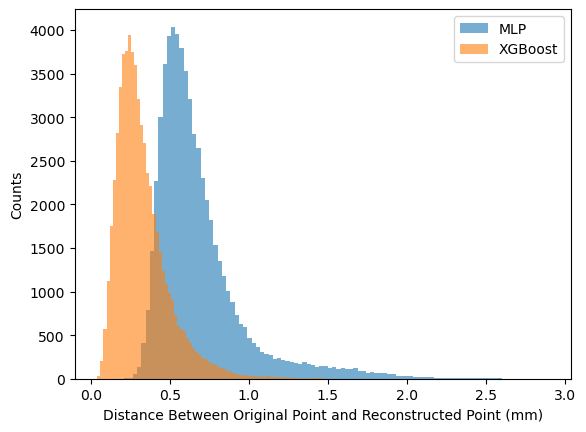

In [9]:
#histogram comparing both methods
plt.hist(MLP_best.ravel(), bins=100, alpha=0.6, label='MLP')
plt.hist(XGBoost_best.ravel(), bins=100, alpha=0.6, label='XGBoost')
plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.savefig("comparison_histogram.png")

In [10]:
#averages
for i in range(15):
    print("Average XGBoost Distance (mm): " + str(np.average(XGBoost_data[i])))
    print("Average MLP Distance (mm): " + str(np.average(MLP_data[i])))

Average XGBoost Distance (mm): 0.35784425787180374
Average MLP Distance (mm): 0.6248935877578864
Average XGBoost Distance (mm): 0.33355684878606984
Average MLP Distance (mm): 0.680779398166009
Average XGBoost Distance (mm): 0.3313804850531561
Average MLP Distance (mm): 0.6551748180960767
Average XGBoost Distance (mm): 0.339274256028592
Average MLP Distance (mm): 0.6557798788910761
Average XGBoost Distance (mm): 0.34482544537756205
Average MLP Distance (mm): 0.6817774494755404
Average XGBoost Distance (mm): 0.3514628639063121
Average MLP Distance (mm): 0.7307972344736717
Average XGBoost Distance (mm): 0.3441136502603499
Average MLP Distance (mm): 0.709764718356719
Average XGBoost Distance (mm): 0.34076624184772797
Average MLP Distance (mm): 0.7059843522081619
Average XGBoost Distance (mm): 0.334933851726517
Average MLP Distance (mm): 0.6361728155257914
Average XGBoost Distance (mm): 0.32635259936305416
Average MLP Distance (mm): 0.6839690687504146
Average XGBoost Distance (mm): 0.336343

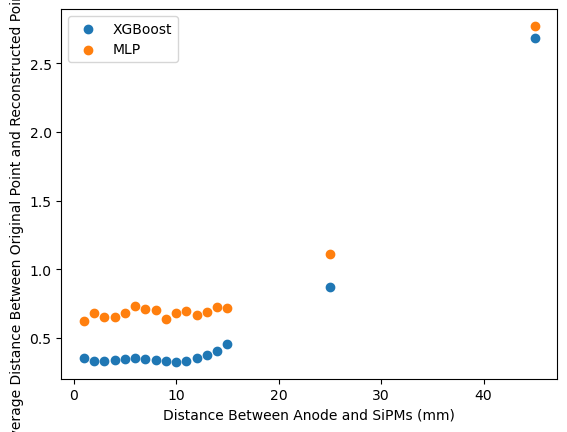

In [11]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 45]
XGBoosty = []
MLPy = []
for i in range(len(x)):
    XGBoosty.append(np.average(XGBoost_data[i]))
    MLPy.append(np.average(MLP_data[i]))

plt.xlabel('Distance Between Anode and SiPMs (mm)')
plt.ylabel('Average Distance Between Original Point and Reconstructed Point (mm)')
plt.scatter(x, XGBoosty, label='XGBoost')
plt.scatter(x, MLPy, label='MLP')
plt.legend(loc='upper left')
plt.savefig("comparison_scatter.png")

[[0.56013495 0.56227104]]
[[2.57469828e-04 6.07724962e-05]]


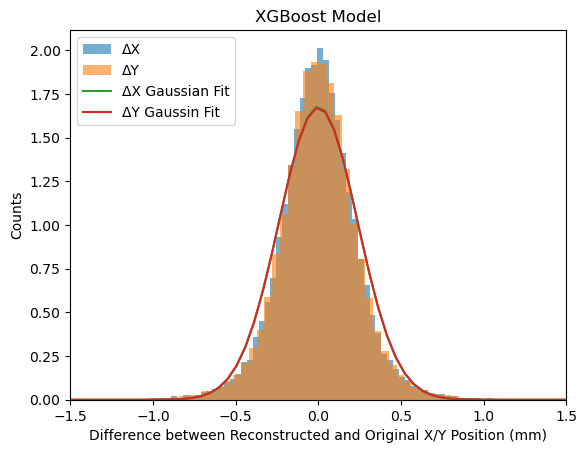

In [12]:
XGBoost_delta_data = np.loadtxt('XGBoost_distances_delta.csv')
XGBoost_delta_data = XGBoost_delta_data.reshape((17, 245, 245, 2))
element = XGBoost_delta_data[9]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:,:,0].ravel())
meany,stdy=norm.fit(element[:,:,1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.hist(element[:,:,0].ravel(), bins=100, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:,:,1].ravel(), bins=100, alpha=0.6, label='ΔY', density=True)
xmin, xmax = plt.xlim()
plt.xlim(left=-1.5, right=1.5)
x = np.linspace(xmin, xmax, 100)
xy = norm.pdf(x, meanx, stdx)
yy = norm.pdf(x, meany, stdy)
plt.plot(x, xy, label='ΔX Gaussian Fit')
plt.plot(x, yy, label='ΔY Gaussin Fit')
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('XGBoost Model')
plt.savefig("XGBoost_resolution.png")
print(np.array(standard_deviations)*2.355)
print(np.array(means))

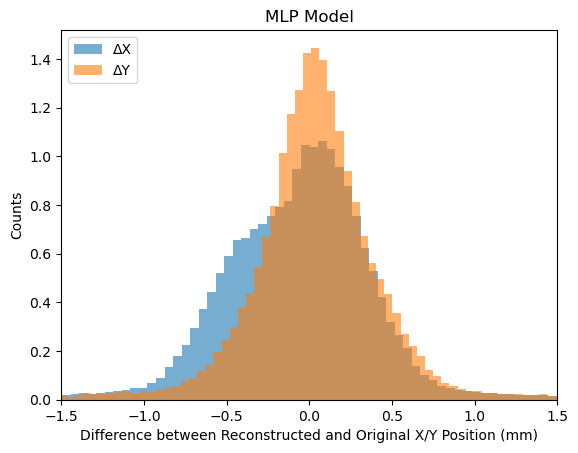

In [48]:
MLP_delta_data = np.loadtxt('MLP_distances_delta.csv')
MLP_delta_data = MLP_delta_data.reshape((15, 245, 245, 2))
element = MLP_delta_data[9]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:,:,0].ravel())
meany,stdy=norm.fit(element[:,:,1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.xlim(left=-1.5, right=1.5)
plt.hist(element[:,:,0].ravel(), bins=100, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:,:,1].ravel(), bins=100, alpha=0.6, label='ΔY', density=True)
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('MLP Model')
plt.savefig("MLP_resolution.png")

[[0.38430882 0.38932805]]
[[ 0.00037989 -0.00030234]]


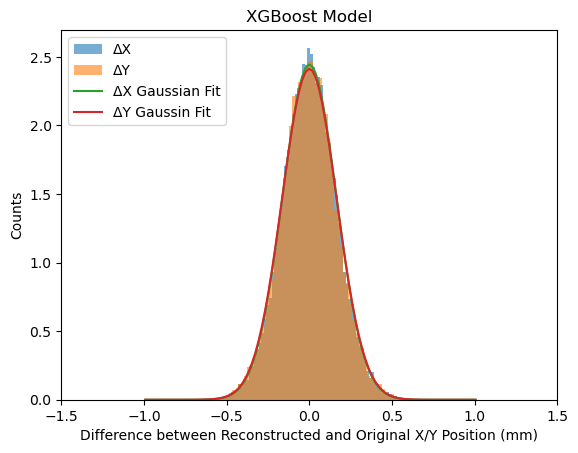

In [33]:
XGBoost_data_cut = np.loadtxt('XGBoost_distances_delta_cut.csv')
XGBoost_data_cut = XGBoost_data_cut.reshape((17, 201, 201, 2))
element = XGBoost_data_cut[9]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:,:,0].ravel())
meany,stdy=norm.fit(element[:,:,1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.hist(element[:,:,0].ravel(), bins=100, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:,:,1].ravel(), bins=100, alpha=0.6, label='ΔY', density=True)
xmin, xmax = plt.xlim()
plt.xlim(left=-1.5, right=1.5)
x = np.linspace(xmin, xmax, 100)
xy = norm.pdf(x, meanx, stdx)
yy = norm.pdf(x, meany, stdy)
plt.plot(x, xy, label='ΔX Gaussian Fit')
plt.plot(x, yy, label='ΔY Gaussin Fit')
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('XGBoost Model')
plt.savefig("XGBoost_resolution_cut.png")
print(np.array(standard_deviations)*2.355)
print(np.array(means))

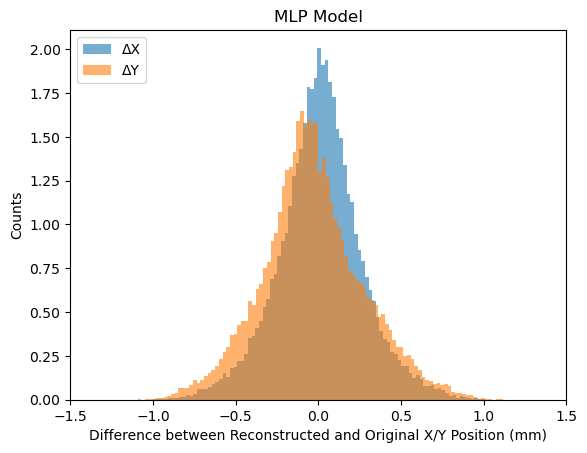

In [16]:
MLP_data_cut = np.loadtxt('MLP_distances_delta_cut.csv')
MLP_data_cut = MLP_data_cut.reshape((15, 245, 245, 2))
#had the wrong array size when putting data in so correcting it here
MLP_data_cut = MLP_data_cut[:,:201,:201,:]
element = MLP_data_cut[9]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:,:,0].ravel())
meany,stdy=norm.fit(element[:,:,1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.xlim(left=-1.5, right=1.5)
plt.hist(element[:,:,0].ravel(), bins=100, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:,:,1].ravel(), bins=100, alpha=0.6, label='ΔY', density=True)
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('MLP Model')
plt.savefig("MLP_resolution_cut.png")

In [21]:
XGBoost_data_cut_distances = np.zeros((17, 201, 201))
for a in range(17):
    for b in range(201):
        for c in range(201):
            XGBoost_data_cut_distances[a][b][c] = math.dist(XGBoost_data_cut[a][b][c], [0,0])

for array in XGBoost_data_cut_distances:
    print(np.average(array))

0.1803097351528727
0.18650471767447327
0.19097060294805474
0.18529811253150646
0.184240608595396
0.17754459611701054
0.1758579857133481
0.178365415897352
0.1890067328344386
0.20405547873131188
0.22747919493243013
0.25090385513124414
0.2727351494697176
0.29992183785378856
0.329787289257769
0.674665527873378
1.6576840911686868


In [22]:
MLP_data_cut_distances = np.zeros((15, 201, 201))
for a in range(15):
    for b in range(201):
        for c in range(201):
            MLP_data_cut_distances[a][b][c] = math.dist(MLP_data_cut[a][b][c], [0,0])

for array in MLP_data_cut_distances:
    print(np.average(array))

0.26369089942802104
0.3147326991343626
0.3059515500307809
0.33442290071131525
0.4133577176551103
0.32406110306822095
0.4180500669171277
0.41280719616766387
0.32503157106331215
0.3458892915262298
0.43823209853785927
0.4135924901367748
0.4255646902159006
0.48375766934086445
0.46914880836698747


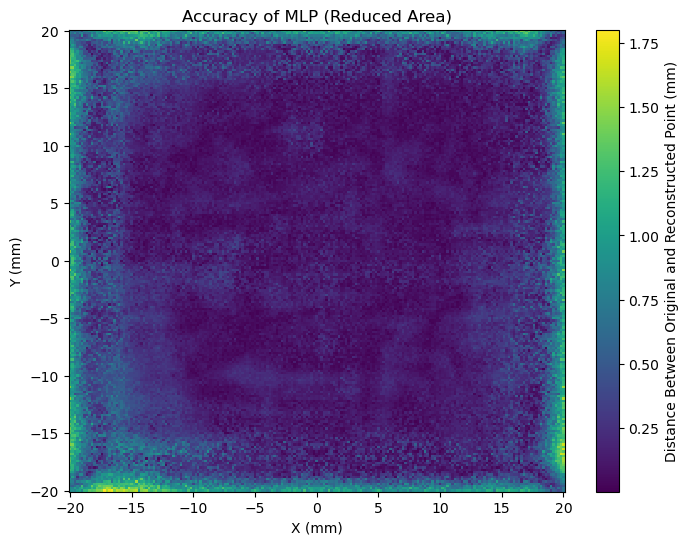

In [35]:
#MLP colormap
#creating colormap
xaxis_cut = 1000*np.linspace(-0.0200, 0.0200, 201)
yaxis_cut = 1000*np.linspace(-0.0200, 0.0200, 201)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis_cut, yaxis_cut, MLP_data_cut_distances[0], shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of MLP (Reduced Area)')

# Display the plot
plt.savefig("MLP_accuracy_cut.png")

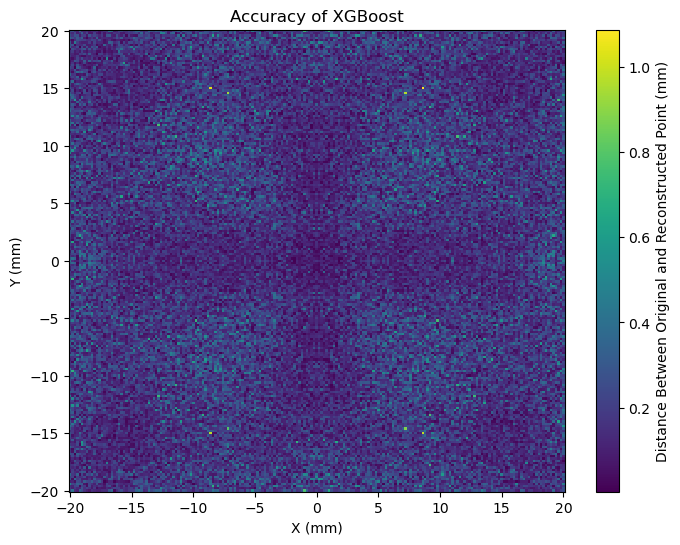

In [36]:
#XGBoost colormap
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis_cut, yaxis_cut, XGBoost_data_cut_distances[6], shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of XGBoost')

# Display the plot
plt.savefig("xgboost_accuracy_cut.png")